In [1]:
from fast_rl.core.basic_train import AgentLearner
from fast_rl.agents.dqn import *
from fast_rl.core.train import AgentInterpretation, GroupAgentInterpretation
from fast_rl.core.data_block import MDPDataBunch
from fast_rl.core.agent_core import ExperienceReplay, GreedyEpsilon
from fastai.basic_data import DatasetType
from fast_rl.agents.dqn_models import *
from fast_rl.core.metrics import *
from fastai.gen_doc.nbdoc import *

Can't import one of these: No module named 'pybulletgym.envs.mujoco.envs'
pygame 1.9.6
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
show_doc(FixedTargetDQNModule.__init__)

<h4 id="FixedTargetDQNModule.__init__" class="doc_header"><code>__init__</code><a class="source_link" data-toggle="collapse" data-target="#FixedTargetDQNModule-__init__-pytest" style="float:right; padding-right:10px">[test]</a></h4>

> <code>__init__</code>(**`ni`**:`int`, **`ao`**:`int`, **`layers`**:`Collection`\[`int`\], **`tau`**=***`1`***, **\*\*`kwargs`**)

<div class="collapse" id="FixedTargetDQNModule-__init__-pytest"><div class="card card-body pytest_card"><a type="button" data-toggle="collapse" data-target="#FixedTargetDQNModule-__init__-pytest" class="close" aria-label="Close"><span aria-hidden="true">&times;</span></a><p>No tests found for <code>__init__</code>. To contribute a test please refer to <a href="/dev/test.html">this guide</a> and <a href="https://forums.fast.ai/t/improving-expanding-functional-tests/32929">this discussion</a>.</p></div></div>

Basic DQN Module. Args:
    ni: Number of inputs. Expecting a flat state `[1 x ni]`
    ao: Number of actions to output.
    layers: Number of layers where is determined per element.
    n_conv_blocks: If `n_conv_blocks` is not 0, then convolutional blocks will be added
                   to the head on top of existing linear layers.
    nc: Number of channels that will be expected by the convolutional blocks. 

In [3]:
show_doc(FixedTargetDQNModule.target_copy_over)

<h4 id="FixedTargetDQNModule.target_copy_over" class="doc_header"><code>target_copy_over</code><a class="source_link" data-toggle="collapse" data-target="#FixedTargetDQNModule-target_copy_over-pytest" style="float:right; padding-right:10px">[test]</a></h4>

> <code>target_copy_over</code>()

<div class="collapse" id="FixedTargetDQNModule-target_copy_over-pytest"><div class="card card-body pytest_card"><a type="button" data-toggle="collapse" data-target="#FixedTargetDQNModule-target_copy_over-pytest" class="close" aria-label="Close"><span aria-hidden="true">&times;</span></a><p>No tests found for <code>target_copy_over</code>. To contribute a test please refer to <a href="/dev/test.html">this guide</a> and <a href="https://forums.fast.ai/t/improving-expanding-functional-tests/32929">this discussion</a>.</p></div></div>

Updates the target network from calls in the FixedTargetDQNTrainer callback.  

In [4]:
show_doc(FixedTargetDQNTrainer.__init__)

<h4 id="FixedTargetDQNTrainer.__init__" class="doc_header"><code>__init__</code><a class="source_link" data-toggle="collapse" data-target="#FixedTargetDQNTrainer-__init__-pytest" style="float:right; padding-right:10px">[test]</a></h4>

> <code>__init__</code>(**`learn`**, **`copy_over_frequency`**=***`3`***)

<div class="collapse" id="FixedTargetDQNTrainer-__init__-pytest"><div class="card card-body pytest_card"><a type="button" data-toggle="collapse" data-target="#FixedTargetDQNTrainer-__init__-pytest" class="close" aria-label="Close"><span aria-hidden="true">&times;</span></a><p>No tests found for <code>__init__</code>. To contribute a test please refer to <a href="/dev/test.html">this guide</a> and <a href="https://forums.fast.ai/t/improving-expanding-functional-tests/32929">this discussion</a>.</p></div></div>

Handles updating the target model in a fixed target DQN. Args:
    learn: Basic Learner.
    copy_over_frequency: For every N iterations we want to update the target model. 

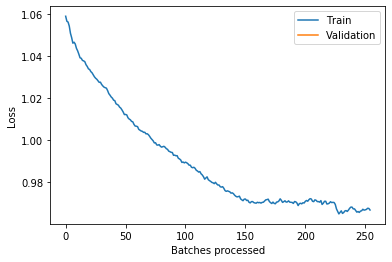

In [5]:
data = MDPDataBunch.from_env('CartPole-v1', render='rgb_array', bs=32, add_valid=False)
model = create_dqn_model(data, FixedTargetDQNModule, opt=torch.optim.RMSprop, lr=0.00025)
memory = ExperienceReplay(memory_size=1000, reduce_ram=True)
exploration_method = GreedyEpsilon(epsilon_start=1, epsilon_end=0.1, decay=0.001)
learner = dqn_learner(data=data, model=model, memory=memory, exploration_method=exploration_method)
learner.fit(10)

data.close()
learner.recorder.plot_losses()

## Rational
Fixed Target DQNs seem to be able to solve environments even if the loss becomes massive. You can reduce this by making the `copy_over_frequency` larger.

Results of the fixed target over 5 runs are auto-generated from the `tests/test_dqn.py` directory. You can run them via:
`py.test tests/test_dqn.py -k 'test_dqn_models_cartpole' -s --include_performance_tests'`. Once finished, it will generate a `.pickle` understandable by the GroupInterpretation object below.

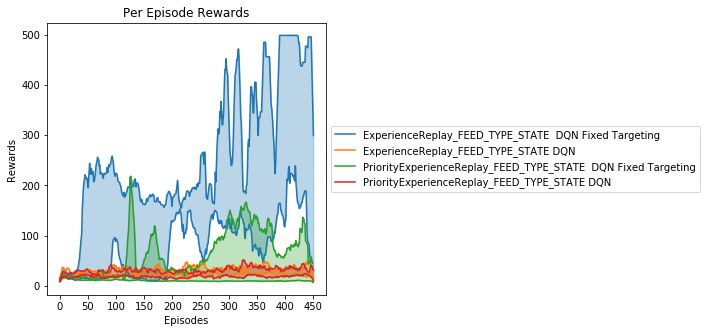

In [6]:
import os
model_dirs = ['data/cartpole_dqn', 'data/cartpole_dqn fixed targeting']
group_interp = GroupAgentInterpretation()
for model_dir in model_dirs:
    for file in os.listdir(model_dir):
        file = file.replace('.pickle', '')
        group_interp.add_interpretation(GroupAgentInterpretation.from_pickle(model_dir, file))
group_interp.plot_reward_bounds(per_episode=True, smooth_groups=10)

In [7]:
group_interp.analysis

,name,average,max,min,type
0,"(DQN, ExperienceReplay_FEED_TYPE_STATE, reward)",27.895787,48.7,8.0,reward
1,"(DQN, ExperienceReplay_FEED_TYPE_STATE, reward)",27.521729,46.8,10.9,reward
2,"(DQN, ExperienceReplay_FEED_TYPE_STATE, reward)",29.128825,44.0,16.9,reward
3,"(DQN, ExperienceReplay_FEED_TYPE_STATE, reward)",26.520843,52.3,10.7,reward
4,"(DQN, ExperienceReplay_FEED_TYPE_STATE, reward)",27.778936,49.2,13.2,reward
5,"(DQN, PriorityExperienceReplay_FEED_TYPE_STATE...",25.197561,36.8,12.0,reward
6,"(DQN, PriorityExperienceReplay_FEED_TYPE_STATE...",22.827716,38.0,9.1,reward
7,"(DQN, PriorityExperienceReplay_FEED_TYPE_STATE...",24.578271,51.9,13.7,reward
8,"(DQN, PriorityExperienceReplay_FEED_TYPE_STATE...",22.751663,36.8,8.8,reward
9,"(DQN, PriorityExperienceReplay_FEED_TYPE_STATE...",26.039690,46.8,9.3,reward


In [ ]:
model_dirs = ['data/lunarlander_dqn', 'data/lunarlander_dqn fixed targeting']
group_interp = GroupAgentInterpretation()
for model_dir in model_dirs:
    for file in os.listdir(model_dir):
        file = file.replace('.pickle', '')
        group_interp.add_interpretation(GroupAgentInterpretation.from_pickle(model_dir, file))
group_interp.plot_reward_bounds(per_episode=True, smooth_groups=10)